# 小世界网络生成
在本次网络生成中，主要采用`newman_watts_strogatz_graph`,对于给定的节点数目和边数，通过添加一定的边生成小世界网络。

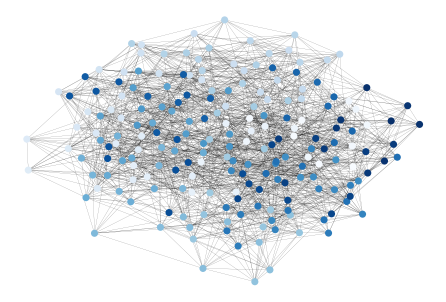

In [64]:
#小世界网络生成
import networkx as nx;
import matplotlib.pyplot as plt

n = 200;
k = 10;
p = 0.7;
seed = 20532;
options = {
    "node_color": range(n),
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
    "cmap": plt.cm.Blues
}

G = nx.generators.random_graphs.newman_watts_strogatz_graph(200, 10, 0.7, seed = seed);
pos = nx.spring_layout(G, threshold=0.0001, seed = seed)
nx.draw(G, pos, **options)
plt.show()

In [91]:
print(nx.average_clustering(G))#完成平均群聚系数的计算
# print(nx.clustering(G))#可以计算各个节点的集聚系数
print(nx.diameter(G))#返回图G的直径
print(nx.average_shortest_path_length(G))#返回图G所有节点间平均最短路径长度
print(nx.is_directed(G))#如果图是有向的，返回true
print(nx.density(G))#返回图的密度
# print(nx.degree_centrality(G))#计算节点的度中心性
# print(nx.closeness_centrality(G))#计算节点的接近中心性
# print(nx.betweenness_centrality(G))#计算节点的介数中心性
# print(nx.edge_betweenness_centrality(G))#计算边的介数中心性
# print(nx.eigenvector_centrality(G))#计算节点的特征向量中心性
# print(nx.current_flow_betweenness_centrality(G))#计算节点的流介数中心性
# print(nx.edge_current_flow_betweenness_centrality(G))#计算边的流介数中心性
print('图中的节点个数', G.number_of_nodes())
print('图中的边数', G.number_of_edges())

0.2751516929862737
3
2.224924623115578
False
0.08597989949748744
图中的节点个数 200
图中的边数 1711


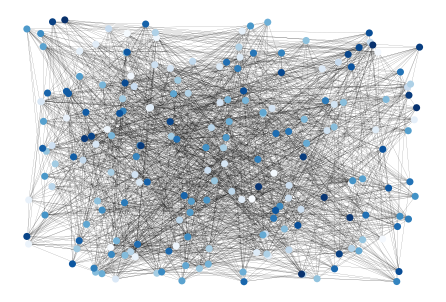

In [42]:
nx.draw_random(G, **options)

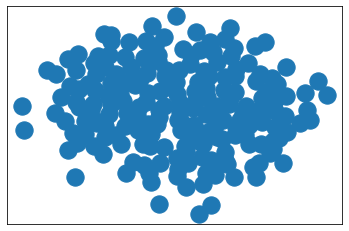

In [66]:
nx.draw_networkx_nodes(G, pos)

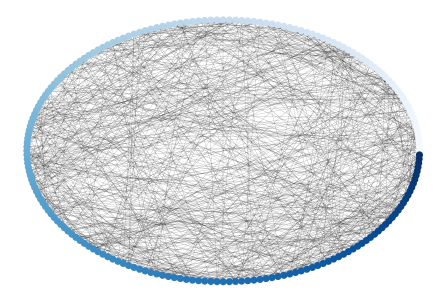

In [72]:
nx.draw_circular(G, **options)

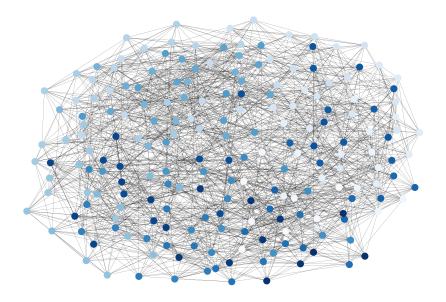

In [78]:
nx.draw_kamada_kawai(G, **options)

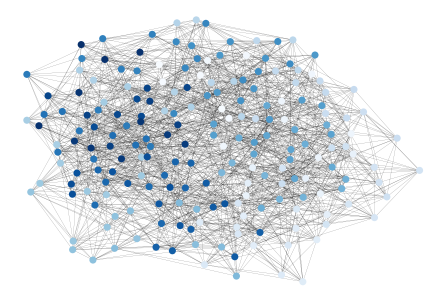

In [77]:
nx.draw_spring(G, **options)

<Figure size 576x576 with 0 Axes>

(-0.05, 1.05)

(-0.05, 1.05)

(-0.05, 1.05, -0.05, 1.05)

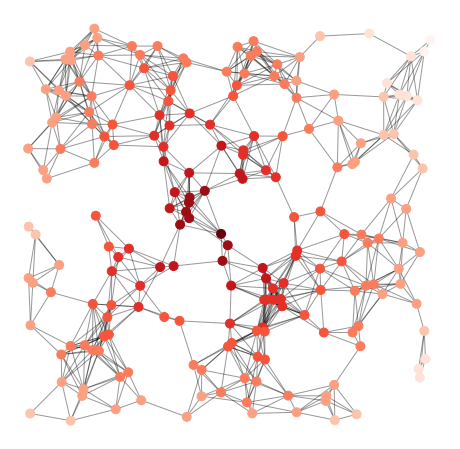

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Use seed when creating the graph for reproducibility
G = nx.random_geometric_graph(200, 0.125, seed=896803)
# position is stored as node attribute data for random_geometric_graph

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

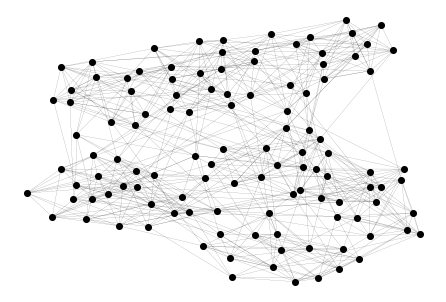

In [16]:
import urllib.request as urllib
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {
    "node_color": "black",
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

# 不同参数下的小世界网络生成